In [1]:
import torch
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy

In [2]:
model_path = './checkpoint/Model97.pt'
state_dict = torch.load(model_path)

In [3]:
from Models.Generator import Generator

In [4]:
device = torch.device("cuda:0" if(torch.cuda.is_available()) else "cpu")

In [15]:
model_path_old = './checkpoint/Model49.pt'
state_dict = torch.load(model_path_old)
gen_old = Generator().to(device)
gen_old.load_state_dict(state_dict['netG'])
print(gen_old)

Generator(
  (conv_t1): ConvTranspose2d(228, 448, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (batch_norm1): BatchNorm2d(448, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t2): ConvTranspose2d(448, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch_norm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv_t4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv_t5): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)


In [5]:
generator = Generator().to(device)
generator.load_state_dict(state_dict['netG'])
print(generator)

Generator(
  (conv_t1): ConvTranspose2d(228, 448, kernel_size=(2, 2), stride=(1, 1), bias=False)
  (batch_norm1): BatchNorm2d(448, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t2): ConvTranspose2d(448, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (batch_norm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv_t4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv_t5): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)


In [6]:
seed = 100
random.seed(seed)
torch.manual_seed(seed)
print("Random Seed: ", seed)

Random Seed:  100


In [7]:
# set noise parameters
num_z = 128
num_discrete = 10
discrete_dim = 10

In [8]:
# Generate Fixed Noise
# get discrete codes
num_images = 100
idx = np.arange(discrete_dim).repeat(10)
discrete_codes = torch.zeros(size=(num_images, num_discrete, discrete_dim), device=device)
for i in range(num_discrete):
    discrete_codes[range(0, num_images), i, idx] = 1.0
    
discrete_codes = discrete_codes.view(num_images, -1, 1, 1)
# get normal noise
normal_noise = torch.randn(num_images, num_z, 1, 1, device=device)

# Fixed noise
fixed_noise = torch.cat((normal_noise, discrete_codes), dim=1)

In [9]:
# 10-20 138 hairstyle
# 50-60 128 emotion
# 80-90 148 less to more hair
# 0-10 178 azimuth(pose)
# 40-50 188 gender
# 30-40 198 skin tone +illumination
# 90-100 208 jawline
# 70-80 218 eyes/glasses

In [35]:
# noises with all features set to 1
my_noise = deepcopy(fixed_noise[0:10])

common_noise = deepcopy(my_noise[0][:128])

# modify noise
for i in range(len(my_noise)):
    my_noise[i][:128] = common_noise
    # position of 1's are 138, 148..
    # set 1's to zeros
    my_noise[i][178][0][0] = torch.tensor(data=0, dtype=torch.float32, device=device)
    # add suitable number to 1's postion to shift index to other class and set it to 1
    my_noise[i][178+i][0][0] = torch.tensor(data=1, dtype=torch.float32, device=device)

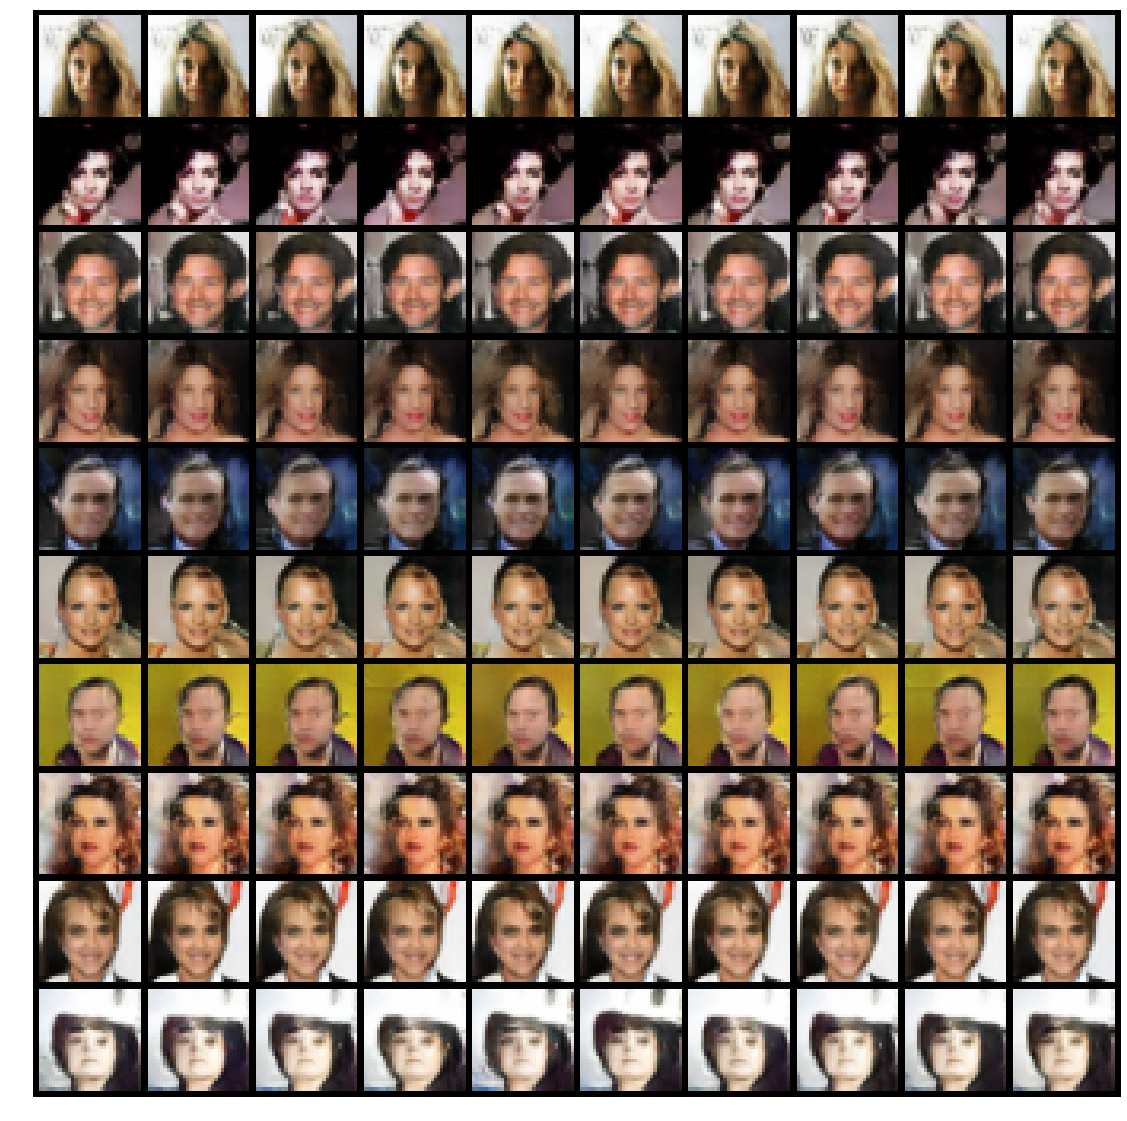

In [38]:
# modified result
with torch.no_grad():
    generated_img1 = generator(fixed_noise).detach().cpu()
# Display the generated image.
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(generated_img1, nrow=10, padding=2, normalize=True), (1,2,0)))
plt.show()

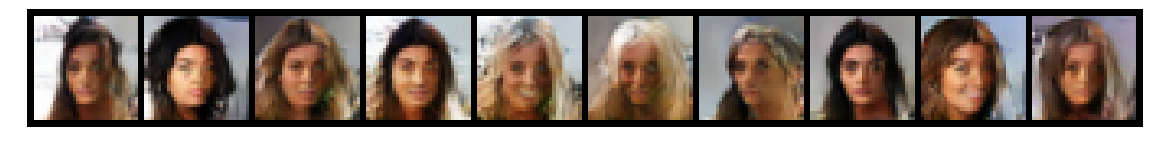

In [37]:
# modified result
with torch.no_grad():
    generated_img1 = gen_old(my_noise).detach().cpu()
# Display the generated image.
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(generated_img1, nrow=10, padding=2, normalize=True), (1,2,0)))
plt.show()